In [1]:
# THE PURPOSE OF THIS SCRIPT IS TO:

# 1) TAKE IN THE FULL MIL MILAGROS DATASET (WITH ONE ROW PER CHECK_UP) AND DERIVE A NEW TABLE FROM IT
#    THIS NEW TABLE WILL HAVE A ROW FOR EACH CHILD WHO HAD AT LEAST 2 CHECK-UPS
#    THE MAIN POINT OF THIS TABLE IS TO SHOWCASE THE CHANGE IN HEIGHT-FOR-AGE Z-SCORE BETWEEN EACH CHILD'S FIRST AND LAST CHECK-UPS, WHICH HAS OBVIOUS
#    IMPORTANCE FOR EVALUATING THE IMPACT OF MIL MILAGROS'S PROGRAM

# 2) CREATE VISUALIZATIONS FOR THE DISTRIBUTION OF CHANGE IN HEIGHT-FOR-AGE Z-SCORES AND OTHER IMPORTANT METRICS

# 3) COMPUTE SUMMARY STATISTICS FOR THE DISTRIBUTION OF CHANGE IN HEIGHT-FOR-AGE Z-SCORES AND THE RATE OF STUNTING AT FIRST AND LAST CHECK-UPS

In [2]:
# IMPORTING PACKAGES
import pandas as pd
import matplotlib.pyplot as plt

# READING IN DATA FROM FULL DATASET
mm_data = pd.read_excel("/Users/ajarbuckle/Desktop/MM PROJECT/mm_data_redo/mm_data_clean.xlsx")
mm_data

,nombre_de_la_madre,nombre_del_niño/niña,fecha_de_nacimiento,sexo,comunidad,fecha_de_monitoreo,peso,talla,edad_a,edad_m,edad_s,ID,puntaje_z
0,Ofelia Gabina Alva Mus,Samuel David Alva Alva,2015-09-19,M,Pahaj,2017-12-06,8.7,76.4,2.214921,26,115,2,-3.906698
1,María Teresa Cos González,Jordy Levni Alfredo López Cos,2016-08-10,M,Pahaj,2019-01-16,13.3,81.0,2.433949,29,127,7,-3.039551
2,Elsa Griselda Xaminez,Kerman Eliel González Xaminez,2016-03-17,M,Pamezabal,2019-01-16,12.4,85.5,2.833676,34,147,8,-2.561794
3,Cristina Godoy,Eduardo Emilio Ixcol Godoy,2015-09-21,M,Los Manantiales,2019-04-10,12.2,86.0,3.550992,42,185,11,-3.493355
4,Ana Cristina Chox Ixcol,Domingo Braxton Tay Chox,2014-06-12,M,Los Manantiales,2019-01-16,15.8,97.3,4.596851,55,239,20,-2.228093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,Carolina Estefany Sajché Zavala,Heredyt Tatiana Noj Sajche,2019-09-10,F,Pahaj,2019-12-11,5.5,58.4,0.251882,3,13,526,-0.654548
3780,Francisca Hilaria Bac,Manuela Claret Tulul,2018-10-24,F,Pahaj,2019-01-18,5.4,55.1,0.235455,2,12,495,-1.958459
3781,Santos Lucrecia López Ixcol de Aju,Nena Recién nacida,2019-02-26,F,Ciénaga Grande,2019-03-13,2.5,43.0,0.041068,0,2,530,-4.473173
3782,Santos Lucrecia López Ixcol de Aju,Nena Recién nacida,2019-02-26,F,Ciénaga Grande,2019-04-10,2.6,45.0,0.117728,1,6,530,-5.064258


In [3]:
# FILTERING DOWN TO ONLY CHILDREN WHO APPEAR MORE THAN ONCE IN THE DATAFRAME; THIS IS BECAUSE AT LEAST 2 OBSERVATIONS ARE NEEDED TO CALCULATE 
# A CHANGE IN HEIGHT-FOR-AGE Z-SCORE

mm_data = mm_data.groupby('ID').filter(lambda x: len(x) > 1)
mm_data

,nombre_de_la_madre,nombre_del_niño/niña,fecha_de_nacimiento,sexo,comunidad,fecha_de_monitoreo,peso,talla,edad_a,edad_m,edad_s,ID,puntaje_z
0,Ofelia Gabina Alva Mus,Samuel David Alva Alva,2015-09-19,M,Pahaj,2017-12-06,8.7,76.4,2.214921,26,115,2,-3.906698
1,María Teresa Cos González,Jordy Levni Alfredo López Cos,2016-08-10,M,Pahaj,2019-01-16,13.3,81.0,2.433949,29,127,7,-3.039551
2,Elsa Griselda Xaminez,Kerman Eliel González Xaminez,2016-03-17,M,Pamezabal,2019-01-16,12.4,85.5,2.833676,34,147,8,-2.561794
3,Cristina Godoy,Eduardo Emilio Ixcol Godoy,2015-09-21,M,Los Manantiales,2019-04-10,12.2,86.0,3.550992,42,185,11,-3.493355
4,Ana Cristina Chox Ixcol,Domingo Braxton Tay Chox,2014-06-12,M,Los Manantiales,2019-01-16,15.8,97.3,4.596851,55,239,20,-2.228093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,Carolina Estefany Sajché Zavala,Heredyt Tatiana Noj Sajche,2019-09-10,F,Pahaj,2019-11-20,6.0,56.0,0.194387,2,10,526,-0.944320
3779,Carolina Estefany Sajché Zavala,Heredyt Tatiana Noj Sajche,2019-09-10,F,Pahaj,2019-12-11,5.5,58.4,0.251882,3,13,526,-0.654548
3780,Francisca Hilaria Bac,Manuela Claret Tulul,2018-10-24,F,Pahaj,2019-01-18,5.4,55.1,0.235455,2,12,495,-1.958459
3781,Santos Lucrecia López Ixcol de Aju,Nena Recién nacida,2019-02-26,F,Ciénaga Grande,2019-03-13,2.5,43.0,0.041068,0,2,530,-4.473173


In [4]:
# GROUP THE DATAFRAME BY CHILD (USING UNIQUE IDENTIFIER ID) AND FIND THE EARLIEST AND LATEST CHECK-UP DATES, ALONG WITH THEIR ASSOCIATED HEIGHTS 
# AND HEIGHT-FOR-AGE Z-SCORES
mm_data_grouped = mm_data.groupby('ID').agg(
    nombre_del_niño=('nombre_del_niño/niña', 'first'),
    fecha_de_nacimiento=('fecha_de_nacimiento', 'first'),
    comunidad=('comunidad', 'first'),
    sexo=('sexo', 'first'),
    monitoreo_prim = ('fecha_de_monitoreo', 'min'),
    monitoreo_ult = ('fecha_de_monitoreo', 'max'),
    talla_prim = ('talla', lambda x: x[mm_data.loc[x.index, 'fecha_de_monitoreo'].idxmin()]),
    talla_ult = ('talla', lambda x: x[mm_data.loc[x.index, 'fecha_de_monitoreo'].idxmax()]),
    z_prim = ('puntaje_z', lambda x: x[mm_data.loc[x.index, 'fecha_de_monitoreo'].idxmin()]),
    z_ult = ('puntaje_z', lambda x: x[mm_data.loc[x.index, 'fecha_de_monitoreo'].idxmax()]),
    observaciones=('fecha_de_monitoreo', 'count')
    )

# CREATING COLUMNS FOR THE DIFFERENCES BETWEEN HEIGHT AND HEIGHT-FOR-AGE Z-SCORE BETWEEN FIRST AND LAST CHECK-UPS
mm_data_grouped['talla_dif'] = mm_data_grouped['talla_ult'] - mm_data_grouped['talla_prim']
mm_data_grouped['z_dif'] = mm_data_grouped['z_ult'] - mm_data_grouped['z_prim']

# CREATING A COLUMN FOR HOW OLD THE CHILD WAS AT THEIR FIRST CHECK-UP (IN YEARS)
mm_data_grouped['monitoreo_prim_edad'] = (mm_data_grouped['monitoreo_prim'] - mm_data_grouped['fecha_de_nacimiento']).astype('timedelta64[D]') / 365.25

# CREATING A COLUMN FOR HOW MANY YEARS BETWEEN FIRST AND LAST CHECK-UP  
mm_data_grouped['duración'] = (mm_data_grouped['monitoreo_ult'] - mm_data_grouped['monitoreo_prim']).astype('timedelta64[D]') / 365.25

# CREATING A COLUMN FOR THE RATE OF HEIGHT-FOR-AGE Z-SCORE CHANGE OVER TIME
mm_data_grouped['z_dif_rate'] = (mm_data_grouped['z_dif'] / mm_data_grouped['duración'])

# CREATING A COLUMN FOR HOW FREQUENTLY THE CHILD HAD CHECK-UPS (NUMBER OF CHECK-UPS PER YEAR)
mm_data_grouped['frecuencia'] = mm_data_grouped['observaciones'] / mm_data_grouped['duración']

# CREATING COLUMNS FOR WHETHER THE CHILD WAS EXPERIENCING STUNTING AT FIRST AND LAST CHECK-UP
mm_data_grouped['stunted_at_first'] = mm_data_grouped['z_prim'] < -2
mm_data_grouped['stunted_at_end'] = mm_data_grouped['z_ult'] < -2

mm_data_grouped

,nombre_del_niño,fecha_de_nacimiento,comunidad,sexo,monitoreo_prim,monitoreo_ult,talla_prim,talla_ult,z_prim,z_ult,observaciones,talla_dif,z_dif,monitoreo_prim_edad,duración,z_dif_rate,frecuencia,stunted_at_first,stunted_at_end
ID,,,,,,,,,,,,,,,,,,,
1,Maybelin Alicia Aju López,2016-02-22,Los Planes,F,2017-08-15,2019-10-25,70.5,87.3,-3.219024,-3.135741,10,16.8,0.083283,1.478439,2.193018,0.037976,4.559925,True,True
2,Samuel David Alva Alva,2015-09-19,Pahaj,M,2017-12-06,2020-01-15,76.4,92.5,-3.906698,-2.904418,11,16.1,1.002280,2.214921,2.108145,0.475432,5.217857,True,True
3,Miriam Tulul Bac,2017-01-25,Pahaj,F,2018-10-19,2021-12-08,72.5,95.6,-3.386637,-2.724794,9,23.1,0.661844,1.730322,3.137577,0.210941,2.868455,True,True
4,Cristian Anibal Avila Chávez,2019-03-21,Xesampual,M,2019-07-03,2021-12-08,62.0,90.0,0.279202,-0.961131,16,28.0,-1.240333,0.284736,2.433949,-0.509597,6.573678,False,False
5,Diego Alejandro Tzaj Chox,2019-01-08,Xesampual,M,2019-05-15,2019-07-31,56.4,61.0,-3.597655,-3.094706,4,4.6,0.502948,0.347707,0.210815,2.385739,18.974026,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Rudy Gabriel Ajú López,2015-12-22,Ciénaga Grande,M,2019-03-13,2019-04-10,85.6,85.8,-3.100616,-3.178239,2,0.2,-0.077623,3.222450,0.076660,-1.012568,26.089286,True,True
538,Nataly Ileana Leal Quisquina,2014-08-06,Ciénaga Grande,F,2019-03-13,2019-04-10,99.2,99.0,-1.646368,-1.795524,2,-0.2,-0.149155,4.599589,0.076660,-1.945679,26.089286,False,False
540,Abby Naomi Monserrat Yac Vásquez,2017-10-18,Nikajkim,F,2019-03-13,2019-04-24,71.2,81.1,-2.650122,0.135025,2,9.9,2.785147,1.399042,0.114990,24.220832,17.392857,True,False


In [5]:
# CHECKING TO SEE HOW MANY ROWS THERE ARE WHERE Z_DIF_RATE EXCEES -3 OR 3
# THESE ROWS ARE LIKELY THE PRODUCT OF INCORRECT MEASUREMENT AND/OR DATA ENTRY, AS THAT WOULD BE QUITE AN UNBELIEVABLE RATE OF GROWTH

((mm_data_grouped['z_dif_rate'] > 3) | (mm_data_grouped['z_dif_rate'] < -3)).sum()

56

In [6]:
# REMOVING THESE ROWS

mm_data_grouped = mm_data_grouped[(mm_data_grouped['z_dif_rate'] <= 3) & (mm_data_grouped['z_dif_rate'] >= -3)]
mm_data_grouped

,nombre_del_niño,fecha_de_nacimiento,comunidad,sexo,monitoreo_prim,monitoreo_ult,talla_prim,talla_ult,z_prim,z_ult,observaciones,talla_dif,z_dif,monitoreo_prim_edad,duración,z_dif_rate,frecuencia,stunted_at_first,stunted_at_end
ID,,,,,,,,,,,,,,,,,,,
1,Maybelin Alicia Aju López,2016-02-22,Los Planes,F,2017-08-15,2019-10-25,70.5,87.3,-3.219024,-3.135741,10,16.8,0.083283,1.478439,2.193018,0.037976,4.559925,True,True
2,Samuel David Alva Alva,2015-09-19,Pahaj,M,2017-12-06,2020-01-15,76.4,92.5,-3.906698,-2.904418,11,16.1,1.002280,2.214921,2.108145,0.475432,5.217857,True,True
3,Miriam Tulul Bac,2017-01-25,Pahaj,F,2018-10-19,2021-12-08,72.5,95.6,-3.386637,-2.724794,9,23.1,0.661844,1.730322,3.137577,0.210941,2.868455,True,True
4,Cristian Anibal Avila Chávez,2019-03-21,Xesampual,M,2019-07-03,2021-12-08,62.0,90.0,0.279202,-0.961131,16,28.0,-1.240333,0.284736,2.433949,-0.509597,6.573678,False,False
5,Diego Alejandro Tzaj Chox,2019-01-08,Xesampual,M,2019-05-15,2019-07-31,56.4,61.0,-3.597655,-3.094706,4,4.6,0.502948,0.347707,0.210815,2.385739,18.974026,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Erikca Maria Rosalina Leal Quisquina,2016-09-28,Ciénaga Grande,F,2019-03-13,2019-04-10,84.7,85.8,-1.493608,-1.382273,2,1.1,0.111335,2.453114,0.076660,1.452326,26.089286,False,False
536,Rudy Gabriel Ajú López,2015-12-22,Ciénaga Grande,M,2019-03-13,2019-04-10,85.6,85.8,-3.100616,-3.178239,2,0.2,-0.077623,3.222450,0.076660,-1.012568,26.089286,True,True
538,Nataly Ileana Leal Quisquina,2014-08-06,Ciénaga Grande,F,2019-03-13,2019-04-10,99.2,99.0,-1.646368,-1.795524,2,-0.2,-0.149155,4.599589,0.076660,-1.945679,26.089286,False,False


In [7]:
# EXPORTING THIS TABLE FOR FUTURE USE 

mm_data_grouped.to_excel('mm_data_individual_table.xlsx', index=False)

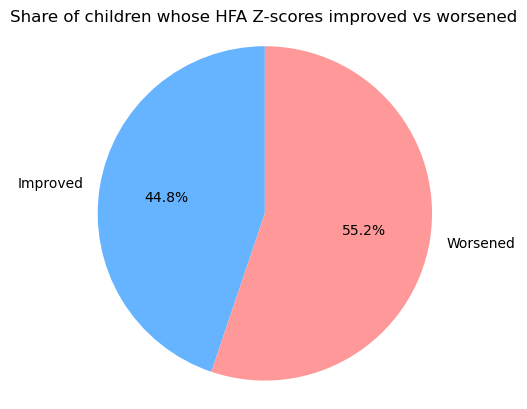

In [8]:
# WHAT PERCENTAGE OF CHILDREN IN THE DATASET IMPROVED THEIR HEIGHT-FOR-AGE Z-SCORE BETWEEN FIRST AND LAST VISITS? WHAT PERCENTAGE WORSENED?

# Calculate the count of values in each part
positive_count = len(mm_data_grouped[mm_data_grouped['z_dif'] > 0])
negative_count = len(mm_data_grouped[mm_data_grouped['z_dif'] <= 0])

# Create a pie chart to represent these two parts
labels = ['Improved', 'Worsened']
sizes = [positive_count, negative_count]
colors = ['#66b3ff', '#ff9999']  # Define colors for positive and non-positive parts

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

plt.title('Share of children whose HFA Z-scores improved vs worsened')
plt.show()

In [9]:
# WHAT PERCENTAGE OF CHILDREN IN THE DATASET WERE STUNTING (HEIGHT-FOR-AGE Z-SCORE < -2) AT THEIR FIRST AND LAST CHECK-UPS? 

percent_stunt_at_first = round((100 * (mm_data_grouped['stunted_at_first'].sum()) / len(mm_data_grouped)), 2)
percent_stunt_at_last = round((100 * (mm_data_grouped['stunted_at_end'].sum()) / len(mm_data_grouped)), 2)

print('Percentage of children who were stunting at first check-up:', percent_stunt_at_first, '%')
print('Percentage of children who were stunting at last check-up:', percent_stunt_at_last, '%')

Percentage of children who were stunting at first check-up: 50.24 %
Percentage of children who were stunting at last check-up: 52.83 %


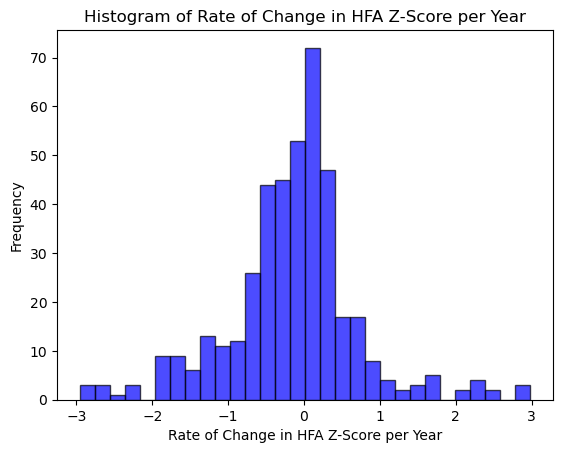

In [10]:
# WHAT WAS THE DISTRIBUTION OF Z_DIF_RATE? 

min_value = mm_data_grouped['z_dif_rate'].min()
max_value = mm_data_grouped['z_dif_rate'].max()
bin_width = 0.2
num_bins = int((max_value - min_value) / bin_width) + 1

plt.hist(mm_data_grouped['z_dif_rate'], bins = num_bins, range=(min_value, max_value), alpha=0.7, color='b', edgecolor='k')

# Set plot labels and title
plt.xlabel('Rate of Change in HFA Z-Score per Year')
plt.ylabel('Frequency')
plt.title(f'Histogram of Rate of Change in HFA Z-Score per Year')

# Show the plot
plt.show()

In [11]:
# WHAT WAS THEIR AVERAGE RATE OF CHANGE OF HEIGHT-FOR-AGE Z-SCORE? 

avg_rate = round(mm_data_grouped['z_dif_rate'].mean(), 2)
print("Average rate of change of HFA z-score:", avg_rate, "SD's per year")

Average rate of change of HFA z-score: -0.15 SD's per year


In [12]:
# WHAT WAS THEIR MEDIAN RATE OF CHANGE OF HEIGHT-FOR-AGE Z-SCORE? 

med_rate = round(mm_data_grouped['z_dif_rate'].median(), 2)
print("Median rate of change of HFA z-score:", med_rate, "SD's per year")

Median rate of change of HFA z-score: -0.09 SD's per year


In [13]:
# FOR CHILDREN WHOSE HEIGHT-FOR-AGE Z-SCORE WORSENED, WHAT WAS THEIR AVERAGE RATE OF CHANGE OVER TIME? 

subset = mm_data_grouped[mm_data_grouped['z_dif'] <= 0]
avg_rate = round(subset['z_dif_rate'].mean(), 2)
print("Average rate of change of HFA z-score for children whose z-score worsened:", avg_rate, "SD's per year")

Average rate of change of HFA z-score for children whose z-score worsened: -0.69 SD's per year


In [15]:
# FOR CHILDREN WHOSE HEIGHT-FOR-AGE Z-SCORE WORSENED, WHAT WAS THEIR MEDIAN RATE OF CHANGE OVER TIME? 

subset = mm_data_grouped[mm_data_grouped['z_dif'] <= 0]
med_rate = round(subset['z_dif_rate'].median(), 2)
print("Median rate of change of HFA z-score for children whose z-score worsened:", med_rate, "SD's per year")

Median rate of change of HFA z-score for children whose z-score worsened: -0.48 SD's per year


In [ ]:
# FOR CHILDREN WHOSE HEIGHT-FOR-AGE Z-SCORE IMPROVED, WHAT WAS THEIR AVERAGE RATE OF CHANGE OVER TIME? 

subset = mm_data_grouped[mm_data_grouped['z_dif'] > 0]
avg_rate = round(subset['z_dif_rate'].mean(), 2)
print("Average rate of change of HFA z-score for children whose z-score improved:", avg_rate, "SD's per year")

In [16]:
# FOR CHILDREN WHOSE HEIGHT-FOR-AGE Z-SCORE IMPROVED, WHAT WAS THEIR MEDIAN RATE OF CHANGE OVER TIME? 

subset = mm_data_grouped[mm_data_grouped['z_dif'] > 0]
med_rate = round(subset['z_dif_rate'].median(), 2)
print("Median rate of change of HFA z-score for children whose z-score improved:", med_rate, "SD's per year")

Median rate of change of HFA z-score for children whose z-score improved: 0.29 SD's per year


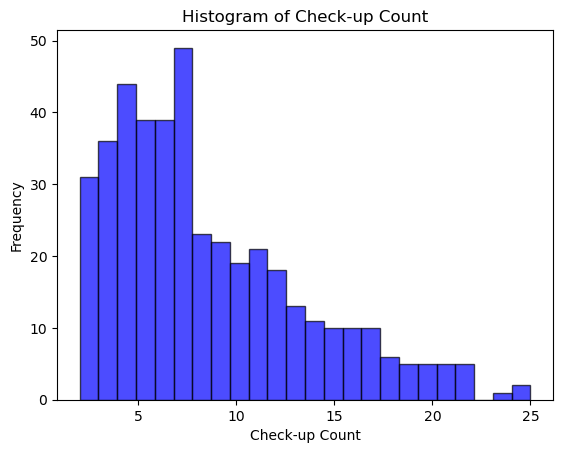

In [17]:
# WHAT WAS THE DISTRIBUTION OF THE TOTAL NUMBER OF CHECK-UPS EACH CHILD HAD? 

min_value = mm_data_grouped['observaciones'].min()
max_value = mm_data_grouped['observaciones'].max()
num_bins = (max_value - min_value) + 1

plt.hist(mm_data_grouped['observaciones'], bins=num_bins, range=(min_value, max_value), alpha=0.7, color='b', edgecolor='k')

# Set plot labels and title
plt.xlabel('Check-up Count')
plt.ylabel('Frequency')
plt.title(f'Histogram of Check-up Count')

# Show the plot
plt.show()

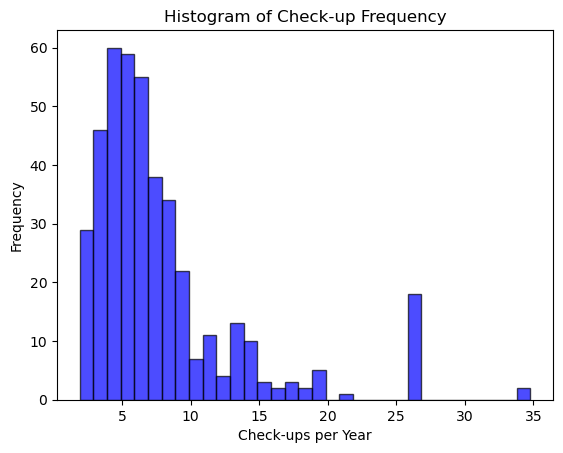

In [18]:
# WHAT WAS THE DISTRIBUTION OF CHECK-UP FREQUENCY PER YEAR? 

min_value = mm_data_grouped['frecuencia'].min()
max_value = mm_data_grouped['frecuencia'].max()
num_bins = int((max_value - min_value)) + 1

plt.hist(mm_data_grouped['frecuencia'], bins=num_bins, range=(min_value, max_value), alpha=0.7, color='b', edgecolor='k')

# Set plot labels and title
plt.xlabel('Check-ups per Year')
plt.ylabel('Frequency')
plt.title(f'Histogram of Check-up Frequency')

# Show the plot
plt.show()

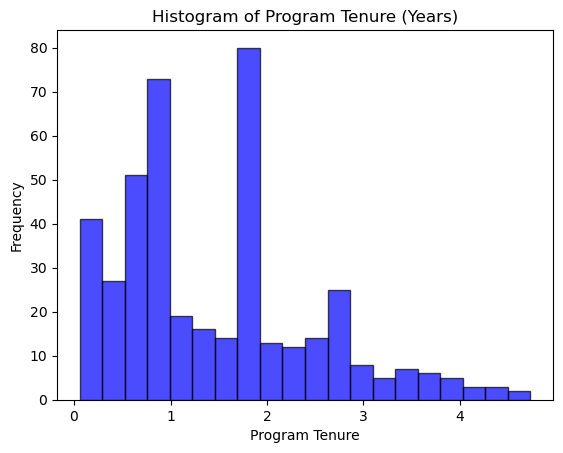

In [19]:
# WHAT WAS THE DISTRIBUTION OF PROGRAM TENURE? 

min_value = mm_data_grouped['duración'].min()
max_value = mm_data_grouped['duración'].max()
# Creating 4 bins per year 
num_bins = (int((max_value - min_value)) + 1) * 4

plt.hist(mm_data_grouped['duración'], bins=num_bins, range=(min_value, max_value), alpha=0.7, color='b', edgecolor='k')

# Set plot labels and title
plt.xlabel('Program Tenure')
plt.ylabel('Frequency')
plt.title(f'Histogram of Program Tenure (Years)')

# Show the plot
plt.show()